In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# defineing data
# a single data array contains H,P,V,M polarization intensity for P2

air_1 = [142, 63.1, 0.2, 59.7] #p1 in H mode
air_2 = [45.3, 103.4, 48.8, 0.5] # p1 in P mode

SLM0_1 = [17.3, 23.2, 89.2, 78.6]
SLM0_2 = [26.9, 2.5, 16.5, 43.6]

SLM25_1= [7.9, 32.3, 103.1, 73.1]
SLM25_2= [24.3, 3.5, 14.8, 41.8]

SLM50_1= [17.7, 27.3, 104.5, 92.6]
SLM50_2 = [30.7, 4.8, 13.3, 47.1]

SLM80_1= [44.9, 8.7, 58.4, 100.3]
SLM80_2= [34.7, 18.4, 6.0, 31.6]

SLM100_1= [74.3, 19.3, 15.1, 84.7]
SLM100_2= [32.5, 37.2, 9.1, 12.3]

In [13]:
# define a function to calulate the strokes vector
def strokes(intensity, flag):
    """
    Calculates the stroke vectors for a given polarization intensity
    Input
    intensity: array of polarization intensity in order H,P,V,M
    
    Output strokes vector of the form
    S = [1, Q/I, U/I] where I = H+V, Q = H-V, U = P-M
    """
    I = intensity[0] + intensity[2]
    Q = intensity[0] - intensity[2]
    U = intensity[1] - intensity[3]
    S = [1, Q/I, U/I]

    # print the strokes vector
    print(flag, end=": ")
    print("%1.1f, %5.3f, %5.3f" % (S[0], S[1], S[2]))
    return S

In [14]:
# calculate the strokes vector for each data set
S_air1 = strokes(air_1,"air_1")
S_air2 = strokes(air_2,"air_1")

print("\n")
S_SLM0_1 = strokes(SLM0_1 ,   "SLM0 P1=H")
S_SLM25_1 = strokes(SLM25_1,  "SLM25 P1=H")
S_SLM50_1 = strokes(SLM50_1,  "SLM50 P1=H")
S_SLM80_1 = strokes(SLM80_1,  "SLM80 P1=H")
S_SLM100_1 = strokes(SLM100_1,"SLM100 P1=H")

print("\n")
S_SLM0_2 = strokes(SLM0_2, "SLM0 P1=P")
S_SLM25_2 = strokes(SLM25_2, "SLM25 P1=P")
S_SLM50_2 = strokes(SLM50_2, "SLM50 P1=P")
S_SLM80_2 = strokes(SLM80_2, "SLM80 P1=P")
S_SLM100_2 = strokes(SLM100_2, "SLM100 P1=P")

air_1: 1.0, 0.997, 0.024
air_1: 1.0, -0.037, 1.094


SLM0 P1=H: 1.0, -0.675, -0.520
SLM25 P1=H: 1.0, -0.858, -0.368
SLM50 P1=H: 1.0, -0.710, -0.534
SLM80 P1=H: 1.0, -0.131, -0.887
SLM100 P1=H: 1.0, 0.662, -0.732


SLM0 P1=P: 1.0, 0.240, -0.947
SLM25 P1=P: 1.0, 0.243, -0.980
SLM50 P1=P: 1.0, 0.395, -0.961
SLM80 P1=P: 1.0, 0.705, -0.324
SLM100 P1=P: 1.0, 0.562, 0.599


In [15]:
# define a function to calulate the linear retardance and optical rotation
def params(SH, SP):
    X1 = SH[1]+SP[2]
    Y1 = SH[2]-SP[1]
    # print(X1, Y1) for debugging wilth proper alignment
    print("X1=%6.4f, Y1=%6.4f" %(X1, Y1))
    #linear retardance
    delta = np.arccos(np.sqrt(X1**2 + Y1**2)-1)
    #optical rotation
    phi = np.arctan(Y1/X1)/2
    print("Delta=%6.4f, Phi=%6.4f\n" %(delta, phi))
    return delta, phi

In [16]:
# calculate the linear retardance and optical rotation for SLM for differnt gray values
delta0, phi0 = params(S_SLM0_1, S_SLM0_2)
delta25, phi25 = params(S_SLM25_1, S_SLM25_2)
delta50, phi50 = params(S_SLM50_1, S_SLM50_2)
delta80, phi80 = params(S_SLM80_1, S_SLM80_2)
delta100, phi100 = params(S_SLM100_1, S_SLM100_2)

X1=-1.6221, Y1=-0.7598
Delta=0.6579, Phi=0.2190

X1=-1.8372, Y1=-0.6105
Delta=0.3597, Phi=0.1604

X1=-1.6717, Y1=-0.9298
Delta=0.4205, Phi=0.2538

X1=-0.4550, Y1=-1.5919
Delta=0.8558, Phi=0.6462

X1=1.2608, Y1=-1.2940
Delta=0.6323, Phi=-0.3992



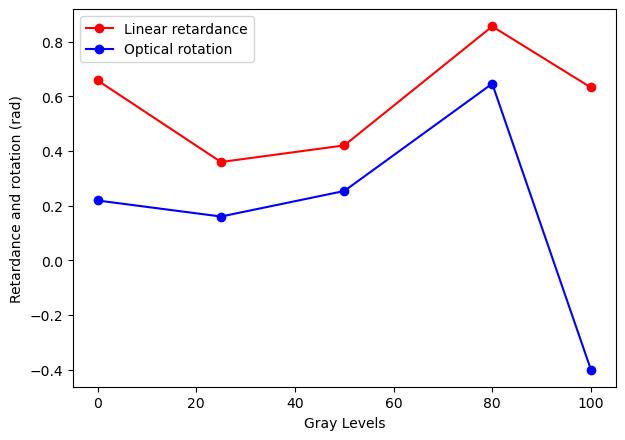

In [17]:
# plot the linear redardance and optical rotation against gray values

gray = [0, 25, 50, 80, 100]
delta = [delta0, delta25, delta50, delta80, delta100]
phi = [phi0, phi25, phi50, phi80, phi100]

plt.figure(figsize=(7,5), dpi=100)
# change marker stye to 'o' for dots
plt.plot(gray, delta, color='red', marker='o', label='Linear retardance')
plt.plot(gray, phi, color='blue',  marker='o', label='Optical rotation')

plt.xlabel('Gray Levels')
plt.ylabel('Retardance and rotation (rad)')
plt.legend()

# plt.savefig('SLM.pdf', dpi=300, bbox_inches='tight')
